# Investigating Fandango Movie Ratings

## Introduction

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this [article](https://fivethirtyeight.com/features/fandango-movies-ratings/).

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:
- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

## Aim of this project

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Understanding the Data

Next we are going to import and explore the data. Data for Hickey's analysis can be found [here](https://github.com/fivethirtyeight/data/tree/master/fandango). Data for 2016 movie ratings can be found [here](https://github.com/mircealex/Movie_ratings_2016_17).

In [1]:
import pandas as pd
fandango_score_comparison = pd.read_csv('fandango_score_comparison.csv')
movie_ratings_unfiltered = pd.read_csv('movie_ratings_2016_2017.csv')

In [2]:
fandango_score_comparison.head(2)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5


In [3]:
#selecting columns that were in Hickey's analysis
important_columns = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
fandango_scores = fandango_score_comparison[important_columns]

In [4]:
movie_ratings_unfiltered.head(2)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.8,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.4,3.65,2.5,4.15,2.5,3.5,2.5,4.0


In [5]:
#selecting columns
important_movie_columns = ['movie', 'year', 'fandango']
movie_ratings = movie_ratings_unfiltered[important_movie_columns]

From repositories' `readme.md` files we can find the following information:

`fandango_score_comparison.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

`movie_ratings_2016_2017.csv` contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017.

Because our goal is to find whether the populations parameters changed after Hickey's analysis or not, we're interested in sampling the population at two different periods in time (before and after Hickey's analysis).

We can see that `fandango_score_comparison` was pulled on Aug. 24, 2015, while `movie_ratings_2016_2017` contains movies from 2016 and 2017. This means that we have before and after data.

#### Some Issues With Data

There are couple issues with our datasets. For example `fandango_score_comparison` only contains data that fills specific requirements, meaning that the data is not a random sample. Does it present the whole population?

`movie_ratings_2016_2017` contains movies "with a significant number of votes", what does that mean? We don't have a clear number.

Both of these samples are subject to temporal trends, so it's unlikely that the data is representative of our population of interest.

## Goal of this project

Because our data is not a random sample, we can't just check is there a difference in reviews before and after Hickey's analysis. With this data we have to change our gooal from determining has there been any change in Fandango's rating system to find out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This should be fairly good proxy for our initial goal.

So what is a popular movie? We are going to choose those movies, that have Hickey's benchmark of 30 fan ratings, meaning that a movie had 30 fan ratings or more on Fandango's website.

## Isolating the Samples We Need

In [6]:
#taking a sample
movie_ratings.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


One quick way to check how good our data is to simply check fan ratings for these movies from fandango website.

|Movie|Fan Ratings|
|-----|-----------|
|Mechanic: Resurrection | 2247 |
|Warcraft | 7271|
|Max Steel | 493 |
|Me Before You | 5263 |
|Fantastic Beasts and Where to Find them | 13400 |
|Cell| 17 |
|Genius | 127 |
|Sully | 11877 |
|A Hologram for the King | 500 |
|Captain America: Civil War | 35057 |

From the table above we can see that 90% of movies in our sample are popular, so we can move on with this data set with more condifence. Let's check the other dataset for popular movies.

In [7]:
#should be 0, because Hickey's criterion was 30 ratings
sum(fandango_scores['Fandango_votes']<30)

0

## 2015 and 2016 Movies

Some movies in our dataset are not released in 2015 or 2016, so let's delete those.

In [8]:
#example
print(fandango_scores['FILM'][143])

Two Days, One Night (2014)


In [49]:
#2015 movies
movies_2015 = fandango_scores[fandango_scores['FILM'].str.contains("2015")]
movies_2015.tail(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
142,'71 (2015),3.5,3.5,192,0.0
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0
145,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,0.0


In [10]:
#example, there are multiple 2017 movies
movie_ratings

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
...,...,...,...
209,X-Men: Apocalypse,2016,4.0
210,XX,2017,3.0
211,xXx: Return of Xander Cage,2017,4.0
212,Zoolander 2,2016,2.5


In [11]:
#filter only 2016 movies
movies_2016 = movie_ratings[movie_ratings['year']==2016]
movies_2016

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
...,...,...,...
207,Whiskey Tango Foxtrot,2016,3.5
208,Why Him?,2016,4.0
209,X-Men: Apocalypse,2016,4.0
212,Zoolander 2,2016,2.5


## Comparing Distribution Shapes for 2015 and 2016

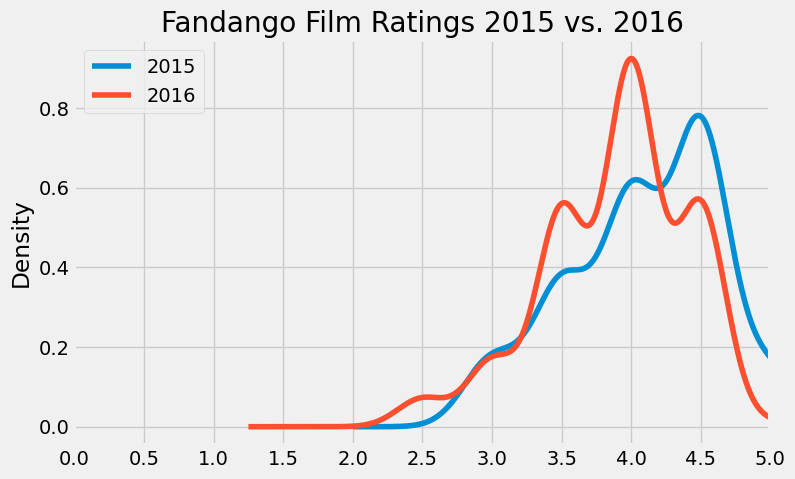

In [12]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

movies_2015['Fandango_Stars'].plot.kde(label = "2015", legend=True, figsize=(8,5))
movies_2016['fandango'].plot.kde(label="2016", legend=True)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.title("Fandango Film Ratings 2015 vs. 2016")
plt.xlim(0,5) #ratings are between 0 and 5
plt.show()

From the table above, we can see that the year 2016 contains more ratings between 3.5 and 4 than the year 2015. Both years are left-skewed, meaning that the higher ratings are still much more common than lower ratings.

## Comparing Relative Frequencies

Let's now compare relative frequencies. Let's first create a frequency table.

In [50]:
freq_2015 = movies_2015['Fandango_Stars'].value_counts().sort_index()
freq_2015

Fandango_Stars
3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: count, dtype: int64

In [51]:
freq_2016 = movies_2016['fandango'].value_counts().sort_index()
freq_2016

fandango
2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: count, dtype: int64

The tables above are a great start, but don't really tell us much. We can see that there are less movies in 2016 with the highest possible rating, but besides that we can't really compare these two tables, because they have a different amount of movies. 

Let's make freq tables that show us percentages for frequencies.

In [15]:
#2015 freq table with percentages
freq_2015_pct = 100*movies_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()
freq_2015_pct

Fandango_Stars
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: proportion, dtype: float64

In [16]:
#2016 freq table with percentages
freq_2016_pct = 100*movies_2016['fandango'].value_counts(normalize=True).sort_index()
freq_2016_pct

fandango
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: proportion, dtype: float64

Again, we can see that there is no 5.0 ratings in 2016, and there is now some movies with 2.5 ratings. We can see that there are clearly less movies with 4.5 stars, but now there is a lot more movies with 4.0 stars. There is definitely less movies with highest ratings (4.5-5.0), but most of the movies still get between 3.5 and 4.5 stars.

## Determining the Direction of the Change

To get clearer picture for the direction of the change, we can use some summary statistics.

In [36]:
#2015 mean, median, mode
mean_2015 = movies_2015['Fandango_Stars'].mean()
median_2015 = movies_2015['Fandango_Stars'].median()
mode_2015 = movies_2015['Fandango_Stars'].mode()[0]

#2016 mean, median, mode
mean_2016 = movies_2016['fandango'].mean()
median_2016 = movies_2016['fandango'].median()
mode_2016 = movies_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index =['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


From the summary we can see that the 2016 mean (3.89) is lower than the 2015 mean (4.09). This means that the average rating is lower in 2016. Median is still the same (4.0), meaning that the middle value for each year is 4.0. Mode is the most common value, so in this case 2015's most common value was 4.5 and in 2016 the most common value was 4.0. Mean and mode values suggest us that the direction of change is downwards, meaning that the ratings have decreased from 2015.

## Visualizing Change

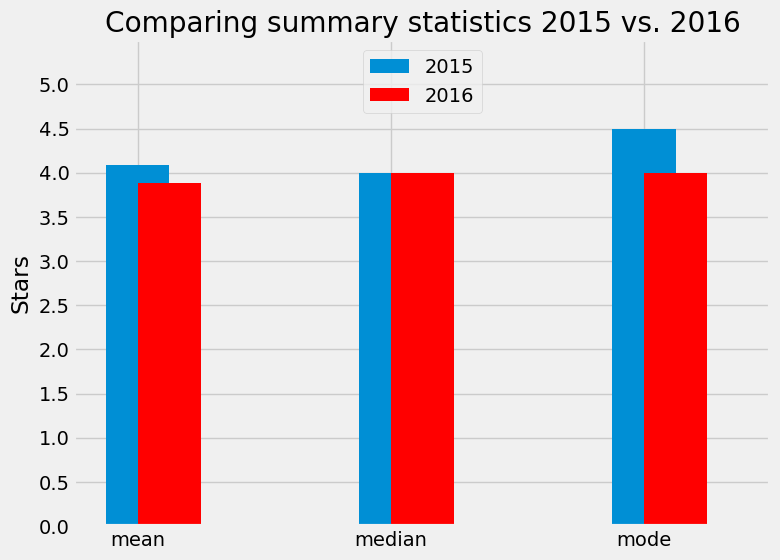

In [46]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(figsize=(8,6),label="2015",align='center', width = 0.25)
summary['2016'].plot.bar(align='edge',color='red', label="2016", rot=0, width = 0.25)
plt.ylim(0,5.5)
plt.legend(loc = 'upper center')
plt.ylabel('Stars')
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.title('Comparing summary statistics 2015 vs. 2016')
plt.show()

## Conclusion

Our project shows that there is a small difference between Fandango's ratings for popular movies between 2015 and 2016. On average, 2016 popular movies are rated lower than popular movies in 2015.